In [2]:
# The Normal Equation is a computationally costly way of perfectly calculating the minimum theta for a linear model
# y_hat = theta_0 + theta_1 * x_1 + theta_2 * x_2 + ... + theta_n * x_n
# y_hat = h_theta(X) = theta_T dot X (_T is transpose and dot is dot product)

# MSE cost function for Linear Regression model
# MSE(theta) == MSE(X, h_theta) = 1/m * sum(theta_T dot x^(i) - y^(i))^2
# where m is the number of incidents and x^(i) is the i-th incident's x vector

In [3]:
# theta_hat = (X_T dot X)^(-1) dot X_T dot y
# theta_hat is the value of theta that minimizes the cost function
# X is the training data
# y is the target values
# here the ^(-1) is matrix inverse

In [4]:
# here is some linear looking data

import numpy as np

X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

In [5]:
import matplotlib.pyplot as plt

plt.scatter(X,y)
plt.show()

In [6]:
X_b = np.c_[np.ones((100,1)), X] 
# add x0 = 1 to each instance
theta_hat = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_hat

array([[ 3.90469082],
       [ 3.12301971]])

In [7]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_hat)
y_predict

array([[  3.90469082],
       [ 10.15073024]])

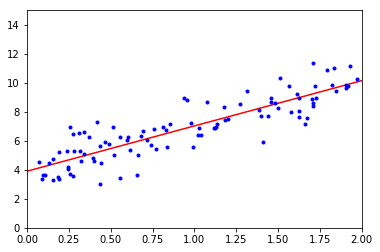

In [8]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [9]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([ 3.90469082]), array([[ 3.12301971]]))

In [10]:
lin_reg.predict(X_new)

array([[  3.90469082],
       [ 10.15073024]])

In [11]:
# the normal equation get very slow when the number of features grows large (e.g., 100,000)

In [12]:
# Gradient Descent

In [13]:
# Warning: when using Gradient Descent you should ensure that all features have a similar scale to optimize convergence time

In [14]:
# Here are three types of Gradient Descent: Batch, Stochastic, and Mini-Batch. Pros and cons of these and using the 
# normal equation are at the end.

In [15]:
# Batch Gradient Descent
# uses the whole batch of training data, so can be slow if that is large

In [16]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    
theta

array([[ 3.90469082],
       [ 3.12301971]])

In [17]:
# Stochastic Gradient Descent
# picks a random instance in the training set at every step to compute gradients.
# decreasing the step size according to a learning schedule is called simulated annealing.

In [18]:
n_epochs = 50
m = len(X_b)
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t+t1)

theta = np.random.randn(2,1) # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        
theta

array([[ 3.84047016],
       [ 3.1055579 ]])

In [19]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

sgd_reg.intercept_, sgd_reg.coef_

/home/oj/ml/env/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


(array([ 3.85365255]), array([ 3.06852106]))

In [20]:
# Mini-batch Gradient Descent
# Instead of all of the training set or a single random instance from the training set, this takes a random sample of data
# to compute the gradient at each step. This allows for performance boost from hardware optimizations from GPUs built for
# matrix operations.

In [21]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 10, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)
        
theta

array([[ 3.94825983],
       [ 3.15125233]])

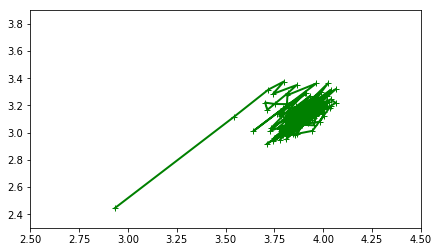

In [22]:
theta_path_mgd = np.array(theta_path_mgd)

plt.figure(figsize=(7,4))
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

In [23]:
# Comparison of algorithms for Linear Regression

# Algorithm       | Large m |  Out-of-core support | Large n | Hyperparams | Scaling required | Scikit-Learn
# Normal Equation |  Fast   |         No           |  Slow   |     0       |       No         | LinearRegression
# Batch GD        |  Slow   |         No           |  Fast   |     2       |       Yes        |    n/a
# Stochastic GD   |  Fast   |         Yes          |  Fast   |     ≥2      |       Yes        |  SGDRegressor
# Mini-batch GD   |  Fast   |         Yes          |  Fast   |     ≥2      |       Yes        |    n/a

In [24]:
# Polynomial Regression

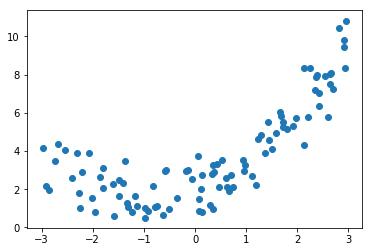

In [25]:
m = 100
X = 6 * np.random.rand(m, 1) -3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

plt.scatter(X,y)
plt.show()

In [26]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([ 2.38942838])

In [27]:
X_poly[0]

array([ 2.38942838,  5.709368  ])

In [28]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([ 1.9735233]), array([[ 0.95038538,  0.52577032]]))

In [29]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

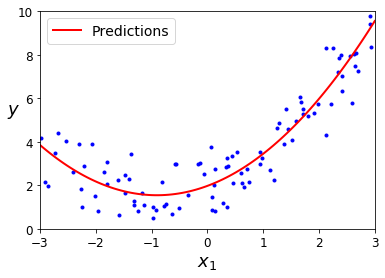

In [30]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
# save_fig("quadratic_predictions_plot")
plt.show()

In [31]:
# degree creep can cause overfitting of training data. use cross-validation metrics to help or look at the learning curve progressions

In [38]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.axis([0,80,0,3])

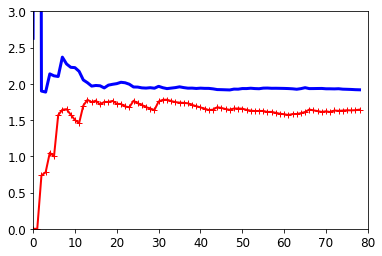

In [39]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

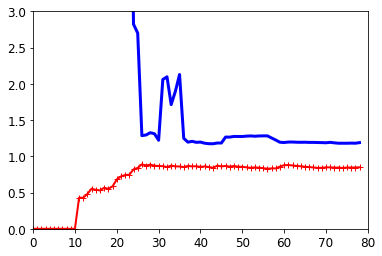

In [40]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline((
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
        ))

plot_learning_curves(polynomial_regression, X, y)

In [41]:
# Bias/Variance Tradeoff

# Bias: This part of the generalization error is due to wrong assumptions such as too simplistic a model. 
# A High Bias model is more likely to underfit the training data.

# Variance: This is due to the model's excessive sensitivity to small variations in the training data. 
# Models with high degrees of freedom are likely to have high variance and overfit the data.

# Irriducible error: This is the noisiness of the data itself. 

In [42]:
# Regulatized Lenear Models. 

# Regularization can occur by limiting the degrees of hte model or by constarining the weights of the model.

In [43]:
# Ridge Regression

# A regularization term equal to alpha * sum(i=1, n, Theta^2_i) is added to the cost function.

# If alpha = 0, the model is just Linear Regression. If alpha is large all the weights end up close to zero
# and you get a flat line going through the mean.

# Increasing alpha reduces the variance but increases its bias.

In [44]:
# Here are examples of Ridge Regression using a closed-form solution and Stochastic Gradient Descent.

In [47]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[ 5.13357033]])

In [50]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

/home/oj/ml/env/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([ 4.38829096])

In [51]:
# Lasso Regression

# This uses the l1 norm instead of l2, alpha * sum(i=1,n, abs(Theta_i))

In [52]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([ 5.09481859])

In [53]:
# Elastic Net is the range of the two above with control mix ratio r. r=0 is Ridge, r=1 is Lasso. In sklearn
# r is l1_ratio

In [54]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([ 5.09373477])

In [55]:
# Early Stopping. 

# Sometimes, adding more training data causes overfitting. This can be measured by looking at the RMSE over Epochs

In [ ]:
from sklearn.base import clone

sgd_reg = SGDRegressor(n_iter=1, warm_start=True, penalty=None,
                      learning_rate="constant", eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val_predict, y_val)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

In [57]:
# Logistic Regression = Logit Regression

In [58]:
from sklearn import datasets

iris = datasets.load_iris()
list(iris.keys())

['target_names', 'feature_names', 'data', 'target', 'DESCR']

In [62]:
X = iris["data"][:, 3:]
y = (iris["target"] == 2).astype(np.int) # 1 if Iris-Virginica, else 0

In [63]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

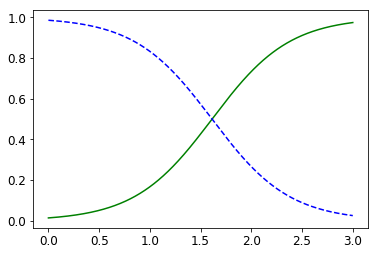

In [65]:
X_new = np.linspace(0, 3, 1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")

In [66]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

In [67]:
# Softmax Regresion (Multinomial Logistic Regression)

# Each class has it's own dedicated parameter vecter Theta^(k) and stored as rows in parameter matrix THETA.

X = iris["data"][:, (2, 3)] # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, y)

softmax_reg.predict_proba([[5, 2]])

array([[  6.33134077e-07,   5.75276067e-02,   9.42471760e-01]])